# 第 4 章 推測統計 (1)
『Python による統計分析入門』（オーム社、2018 年）第 4 章の読書ノート。

## 4.1 離散的現象の数え上げと確率

* 離散的と連続的を分けて考える。→現象が加算個の事象からなるものを離散的だというのだろう。そうでない現象は連続的だ。
* 順列、組み合わせを活用する。→Python では permutations も combinations も容易に求められるはず。本書には今の所書かれていないが。
* 試行と事象の区別をつける。→試行の結果が事象だ。
  * 例えばまともなサイコロ一つを一回振るのは試行であり、それで 4 の目が出るのは事象の一つだ。
* 二つの事象が独立的であるとはどういうことか？→互いが互いに影響しないような事象同士を独立的であるという。
  * 例えば麻雀の数牌を一枚めくって、数字を見ることと色を見ることは独立的だ。
  * これらの事象 $A, B$ の確率 $P(A), P(B)$ について、**独立事象の乗法定理** が成り立つ：
  
     $$P(A \cap B) = P(A) P(B).$$
  
* **条件付き確率**とは何か？→独立的でない事象 $A, B$ に対して、「事象 $A$ が起きたあとに事象 $B$ が起きる確率」などをそう呼ぶ。
  * この確率を記号 $P(B|A)$ で表す： $$P(B|A) = \frac{P(A \cap B)}{P(A)}$$
  * この式を変形すると次のようになる： $$P(A \cap B) = P(A) P(B|A).$$

* **ベイズの定理**とは何であるか？ または何でないか？→上の式を二度適用すると次が得られる：
  $$P(B|A) = \frac{P(B)P(A|B)}{P(A)}.$$
  これがベイズの定理だ。
  
  * 事象 $A$ が起きたあとで事象 $B$ が起こる確率（左辺）とは、
  * 事象 $A$ が起きる前の事象 $B$ の確率（右辺分子左）と
  * 事象 $B$ が起こったあとに事象 $A$ が起こる確率（右辺分子右）の積を、
  * 事象 $A$ の確率で割って（右辺分母）
  
  得られると主張している。

## 4.2 連続現象の確率分布
* **確率変数**とは何か？

  * 本書では「コイン投げの結果」や「サイコロの出た目」などの確率的に動く量だと言っている。
    身長や所要時間のばらつきを考えるならば、それらが確率変数となると言っている。

* **確率分布**とは何か？

  * 確率変数の取りうる値それぞれに対する、その値が起こる確率の対応だと言っている。イメージは図 4-3 のグラフ。

* **確率密度関数**とは何か？

  確率分布を示す関数をそう呼ぶ。連続分布の場合、その積分値が確率の値となるような関数のことだ：
  $$
  P(a \le X \le b) = \int_a^b\!f(x)\,\mathrm{d}x.
  $$

* **期待値**とは何か？

  * 離散確率変数の場合は、確率変数の取り得る値それぞれに対して、その確率の積の和で定義する。
  * 連続確率変数の場合は、和というより積分で定義する。
  * 本ノートでは記号 $E[\cdot]$ で表す。
  
  $$
  \begin{align*}
  E[X] &= \sum_i x_i P(x_i)\\
  E[X] &= \int_{-\infty}^{\infty}\!x f(x)\,\mathrm{d}x\\
  \end{align*}
  $$

* 確率変数の**分散**、**標準偏差**はどのように定義されているか？

  分散 $V(X)$ の定義は次の式で与えられる（上が離散、下が連続）：
  $$
  \begin{align*}
  V(X) &= \sum_i (x_i - \mu)^2 P(x_i)\\
  V(X) &= \int_{-\infty}^{\infty}\!(x - \mu)^2 f(x)\,\mathrm{d}x\\
  \end{align*}
  $$
  ここで $\mu = E[X]$ とおいた。
  
  ただし、計算のときは次の式で求めるのがふつうだ：
  $$
  V(X) = E[X^2] - E[X]^2
  $$
  
  標準偏差 $\sigma$ とは $\sigma = \sqrt{V(X)}$ で与えられる値のことだ。

* 分布の標準化とは何か？→
  確率変数の値を調整して $\mu=0,\ \sigma=1$ とすることをいう。
  
  $$
  Y = \dfrac{X - E[X]}{\sqrt{V(X)}}
  $$
  
  利点が二つある。
  
  * データの性質を大小を気にせずに比較できるようになる。
  * 標準正規分布表と比較できるようになる。
  
* **モーメント**とは何か？ 力学でいうそれと何か関係があるのか？

  期待値、**歪度**、**尖度**を計算する式の次数を一般化したものをモーメントと呼ぶに過ぎない。
  
  * $\mu_r = E[X^r]$
  * $\mu_r = E[(X - \mu)^r]$
  * $\alpha_r = E\left[\left(\dfrac{X - \mu}{\sigma}\right)^r\right]$

* チェビシェフの不等式とは何を説明するものか？

  * 言葉で表現すると「値と平均値の距離が標準偏差の任意の正数 $k$ 倍より大きい確率が $k^{-2}$ で抑えられる」。
  
    $$
    P(\left|X - \mu\right| \ge k\sigma) \le \dfrac{1}{k^2}.
    $$
  
  * 下の形に書き換えられる：

    $$
    P(\left|X - \mu\right| \ge k) \le \dfrac{V(X)}{k^2}.
    $$
    
  これは分散の意味をよく表している。

* 代表的な離散的分布にはどのようなものがあるか？→
  離散分布と連続分布に分類しておぼえる。それぞれの期待値、分散、標準偏差を頭に叩き込んでおく。
  
  * **二項分布**
  
    * Bernoulli 試行列の確率分布
  
  * **Poisson 分布**
  
    * $n$ が巨大で $p$ が小さい二項分布だと考える。
  
  * **正規分布**
  
    * 先述のように、任意の正規分布を標準化することができる。これにより教科書の分布表と比較することができる。
    * 68-95-99 ルールをよくおぼえておくこと。
    * 中心極限定理の関係でこの分布は重要だ。
  
  * **指数分布**
  
    * 待ち行列理論によく出てくる。
      単位時間あたり平均 $\lambda$ 回起こるランダムな事象に関する発生時間間隔に対する確率分布。

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

`scipy.stats.norm.pdf()` で正規分布の確率密度関数を扱える。
ちなみに、他の連続確率分布の確率密度関数も `.pdf()` で処理できる。

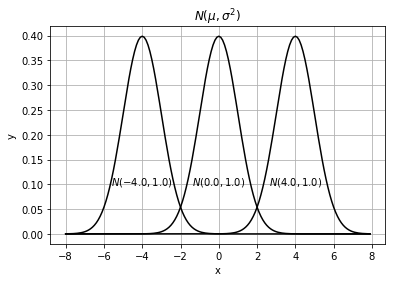

In [2]:
from scipy.stats import norm

sigma = 1.0
x = np.arange(-8., 8., 0.1)

for mu in (0.0, 4.0, -4.0):
    y = norm.pdf(x, loc=mu, scale=sigma)
    plt.plot(x, y, color='black')
    plt.text(mu, 0.1, f'$N({mu:.1f}, {sigma**2:.1f})$', ha='center')

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('$N(\mu, \sigma^2)$')
plt.show()

指数分布の場合 `scale` 引数の値の指定方法に注意を要する。

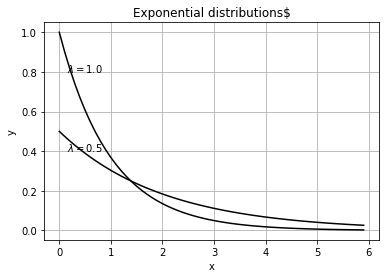

In [3]:
from scipy.stats import expon

x = np.arange(0, 6, 0.1)

for lamb in (0.5, 1.0):
    y = expon.pdf(x, loc=0, scale=1 / lamb)
    plt.plot(x, y, color='black')
    plt.text(0.5, 0.8 * lamb, f'$\lambda = {lamb:.1f}$', ha='center')

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponential distributions$')
plt.show()